In [ ]:
### Ques 1 

In [ ]:
# Import Statements

In [2]:

import numpy as np
import pandas as pd
import matplotlib
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline



In [ ]:
# Load dataset and split in test and training dataset.

''' we can import datasets digits directly because its in the sklearn package 
and after importing it and loading it we can directly do it '''

In [7]:
from sklearn import datasets
digits= datasets.load_digits()

digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [9]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['target'] = digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis='columns'), df.target, test_size=0.3, random_state=2)

In [ ]:
''' here we have split our datset into the testing and traing set of datset and 
where we will train our model '''

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# now we will train our model 

In [15]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(KNeighborsClassifier(),{
    'n_neighbors': [3,4,5,6,7,8,9,10]
}, cv=5, return_train_score=False)

clf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10]})

In [16]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006455,0.005161,0.055850,0.037399,3,{'n_neighbors': 3},0.992063,0.984127,0.988048,0.976096,0.988048,0.985676,0.005408,2
1,0.007050,0.007152,0.042193,0.006122,4,{'n_neighbors': 4},0.992063,0.980159,0.984064,0.972112,0.988048,0.983289,0.006855,4
2,0.000000,0.000000,0.048890,0.004023,5,{'n_neighbors': 5},0.988095,0.984127,0.984064,0.988048,0.988048,0.986476,0.001944,1
3,0.010064,0.006708,0.036337,0.006475,6,{'n_neighbors': 6},0.988095,0.980159,0.980080,0.976096,0.988048,0.982495,0.004784,5
4,0.006046,0.004090,0.045598,0.000491,7,{'n_neighbors': 7},0.984127,0.980159,0.988048,0.980080,0.988048,0.984092,0.003546,3
5,0.003600,0.000490,0.046390,0.000577,8,{'n_neighbors': 8},0.984127,0.968254,0.980080,0.976096,0.984064,0.978524,0.005931,7
6,0.001600,0.001959,0.047638,0.005036,9,{'n_neighbors': 9},0.984127,0.976190,0.980080,0.980080,0.988048,0.981705,0.004045,6
7,0.003416,0.006833,0.046644,0.000463,10,{'n_neighbors': 10},0.984127,0.976190,0.980080,0.968127,0.984064,0.978518,0.005967,8


In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
knn.score(X_test, y_test)

0.9740740740740741

In [ ]:
# we are printing confusion matrix 

In [19]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[54,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 58,  0,  1,  0,  1,  1,  1],
       [ 0,  0,  0,  0, 51,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 58,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 55,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 55,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 44,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  1, 41]], dtype=int64)

In [ ]:
# now if you want to see it more beautiful we can print heatmap for better visualisation 

Text(83.22222222222221, 0.5, 'Truth')

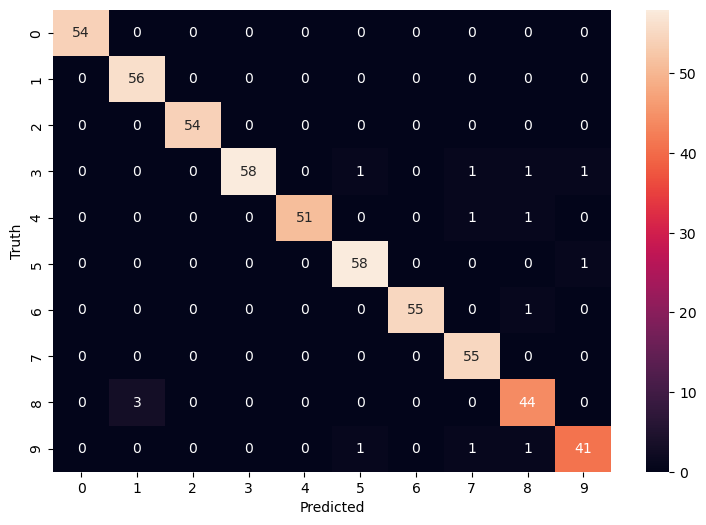

In [20]:
# Now creating the heatmap of the above matrix
import seaborn as sn
from matplotlib import pyplot as plt

plt.figure(figsize=(9,6))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
# here we predict accuracy 

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.95      1.00      0.97        56
           2       1.00      1.00      1.00        54
           3       1.00      0.94      0.97        62
           4       1.00      0.96      0.98        53
           5       0.97      0.98      0.97        59
           6       1.00      0.98      0.99        56
           7       0.95      1.00      0.97        55
           8       0.92      0.94      0.93        47
           9       0.95      0.93      0.94        44

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [ ]:
################################### Ques 2#####################

In [88]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers




In [89]:
data_df = pd.read_csv(r"C:\Users\user\Desktop\data\wine.data")
data_df

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [105]:
# hyperparameterrs


n_layers = 3
layer_sizes = [64, 32, 16]
activations = ['relu', 'relu', None]
loss_fn = 'mse'
optimizer = 'adam'
learning_rate = 0.001
batch_size = 32
n_epochs = 100

In [90]:
def fn_plot_hist(hist_df):
    
    # instantiate plt object with 1 row two columns
    fig, axes = plt.subplots(1,2 , figsize = (15,6)) 

    # propertiesfor matplotlib.patch.Patch 
    props = dict(boxstyle='round', 
                 facecolor='aqua', 
                 alpha=0.4)

    ax = axes[0]

    # plot loss columns of the dataframe
    hist_df.plot(y = ['loss','val_loss'], ax = ax, colormap=CMAP)

    # mark min loss and min val_loss
    lossmin = hist_df['loss'].min()
    testmin = hist_df['val_loss'].min()

    # little beautification
    txtstr = "Min Loss: \n Training : {:7.4f}\n Testing   : {:7.4f}".format(lossmin,
                                                                            testmin) #text to plot

    # place a text box in upper left in axis coords
    ax.text(0.4, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    # set labels on the axes
    ax.set_xlabel("Epochs")

    ax.set_ylabel("Loss")

    # show grid
    ax.grid();

    # for second figure
    ax = axes[1]

    # plot accuracy and val_accuracy
    hist_df.plot( y = ['accuracy', 'val_accuracy'], ax = ax, colormap=CMAP)
    

    # get max accuracies
    accmax = hist_df['accuracy'].max()
    testmax = hist_df['val_accuracy'].max()
    
    # little beautification
    txtstr = "Max Accuracy: \n Training : {:7.4f}\n Testing   : {:7.4f}".format(accmax,
                                                                                testmax) #text to plot

    # place a text box in upper left in axis coords
    ax.text(0.4, 0.5, txtstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    # mark labels
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Accuracy")
    
    # show grid
    ax.grid();
    
    # organise subplot params so that the subplots fit in to the figure area
    plt.tight_layout()

In [91]:
column_names = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar',
                'chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density',
                'pH','sulphates','alcohol','quality']

In [92]:
data_df.isna().sum()

1        0
14.23    0
1.71     0
2.43     0
15.6     0
127      0
2.8      0
3.06     0
.28      0
2.29     0
5.64     0
1.04     0
3.92     0
1065     0
dtype: int64

In [93]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_df, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

112 train examples
29 validation examples
36 test examples


In [94]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# define the model architecture

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='sigmoid', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='sigmoid'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [111]:
sc = StandardScaler()

train = sc.fit_transform(train)

test = sc.transform(test)

In [112]:
train.shape

(112, 14)

In [113]:
# prepare

# Callig class Sequential and pass all layers as a list
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(18, activation='swish'), # alternatively activation = tf.nn.silu
  tf.keras.layers.Dense(4) # notice absense of softmax function
])

In [120]:
train[:1].shape

(1, 14)

In [123]:
predictions = model(train[:1]).numpy()
predictions

array([[ 0.30012336,  0.4305945 , -0.34048834,  0.50623393]],
      dtype=float32)

In [124]:
predictions.sum()

0.8964635

In [125]:
tf.nn.softmax(predictions).numpy()

array([[0.25672466, 0.2925031 , 0.13528618, 0.3154861 ]], dtype=float32)

In [126]:
predictions.sum()

0.8964635

In [127]:
tf.nn.softmax(predictions).numpy().sum()

1.0

In [128]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            multiple                  270       
                                                                 
 dense_14 (Dense)            multiple                  76        
                                                                 
Total params: 346
Trainable params: 346
Non-trainable params: 0
_________________________________________________________________


In [129]:
loss_fn = tf.keras.losses.CategoricalCrossentropy ( from_logits = True)

In [130]:
train[:1]

array([[-1.11002416,  0.72369085,  0.67560604,  0.64193428, -1.40767759,
         1.17067217,  0.69894218,  1.02597036, -1.49886718,  0.13812198,
        -0.01791103, -0.03508078,  1.01833025,  0.20661596]])

In [ ]:
# compile the model

In [135]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

NameError: name 'loss_df' is not defined

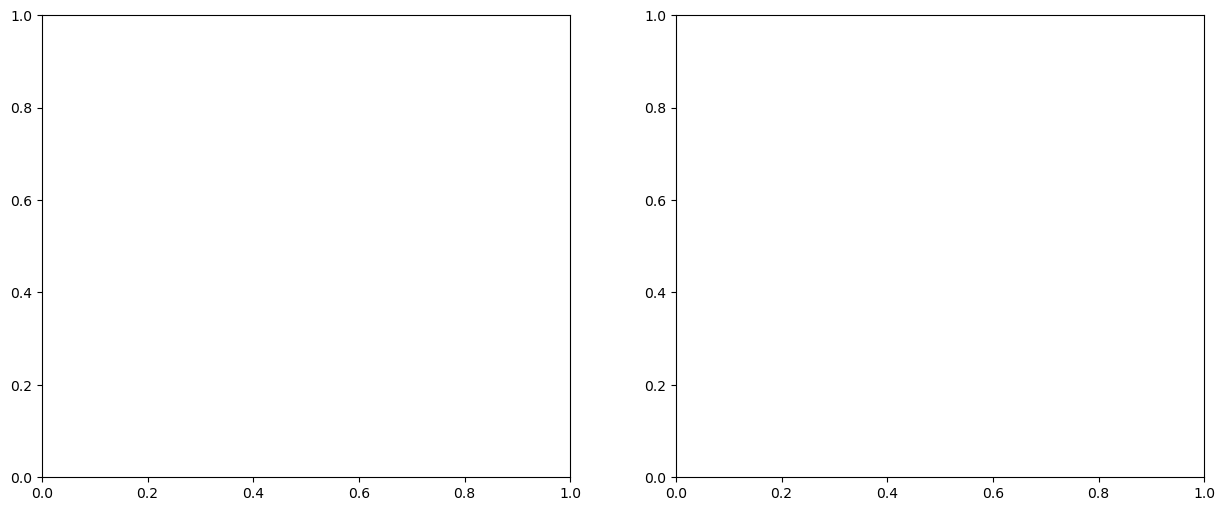

In [136]:
fig, axes = plt.subplots(1,2 , figsize = (15,6),)

l_range = 10 # ignoring first few records
y1_var = 'loss'
y2_var = 'val_loss'

ax = axes[0]

loss_df[[y1_var, y2_var]].plot( ax = ax)

# get values for plotting
st_loss = loss_df[y1_var].iloc[0]
end_loss = loss_df[y1_var].iloc[-1]
t_st_loss = loss_df[y2_var].iloc[0]
t_end_loss = loss_df[y2_var].iloc[-1]

# little beautification
train_txtstr = "Train Loss: \n  Start : {:7.4f}\n    End : {:7.4f}".format( st_loss, end_loss )    # Train text to plot

test_txtstr = "Test Loss: \n  Start : {:7.4f}\n    End : {:7.4f}".format( t_st_loss, t_end_loss ) # Test text to plot
txtstr = ' {} \n{}'.format(train_txtstr, test_txtstr)
# properties  matplotlib.patch.Patch 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords

ax.text(0.4, 0.95, txtstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

ax.set_xlabel('epoch')
ax.set_ylabel(y1_var)
ax.set_title('Overall')
ax.grid();

ax = axes[1]

y1_var = 'accuracy'
y2_var = 'val_accuracy'

loss_df[[y1_var, y2_var]].plot( ax = ax)

# get values for plotting
st_loss = loss_df[y1_var].iloc[0]
end_loss = loss_df[y1_var].iloc[-1]
t_st_loss = loss_df[y2_var].iloc[0]
t_end_loss = loss_df[y2_var].iloc[-1]

# little beautification
train_txtstr = "Train Accuracy: \n  Start : {:7.4f}\n    End : {:7.4f}".format( st_loss, end_loss )    # Train text to plot

test_txtstr = "Test Accuracy: \n  Start : {:7.4f}\n    End : {:7.4f}".format( t_st_loss, t_end_loss ) # Test text to plot# properties  matplotlib.patch.Patch 
txtstr = ' {} \n{}'.format(train_txtstr, test_txtstr)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords

ax.text(0.4, 0.95, txtstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

ax.set_xlabel('epoch')
ax.set_ylabel(y1_var)
ax.set_title('Accuracies'.format(l_range))
ax.grid();
plt.tight_layout()